In [2]:
import csv
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Talk page usernames
csvpath = '/home/michael/school/cprose_research/wp/wikipedia/data/ipc_utf8_talkpages.csv'
talk_username_mentions = []

with open(csvpath, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        talk_username_mentions.append(row[3])

talk_counter = Counter(talk_username_mentions)
len(talk_counter)

6605

In [4]:
# ARTICLE USERNAMES
art_filepath = '/home/michael/school/cprose_research/wp/wikipedia/data/ipc_article_biases.csv'

article_usernames = []

with open(art_filepath, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        article_usernames.append(row[2])

article_counter = Counter(article_usernames)
len(article_counter)

232451

In [5]:
# Editors in both article and talk pages
both_usernames = []

for name in article_counter.keys():
    if name in talk_username_mentions:
        both_usernames.append(name)
        
len(both_usernames)

5075

In [6]:
# See editors w more than 5 edits
edit_threshold = 5
eds_above_threshold = []

for ed in article_counter.keys():
    if article_counter[ed] >= edit_threshold:
        eds_above_threshold.append(ed)

len(eds_above_threshold)

26247

In [7]:
# Editors w more than 5 edits in talk pages
both_threshold_usernames = []

for name in eds_above_threshold:
    if name in both_usernames:
        both_threshold_usernames.append(name)
        
len(both_threshold_usernames)

3642

In [5]:
# Number of editors for each count numbers
article_counts = Counter(article_counter.values())
list(article_counts.items())[:40]
#list(article_counts.values())[:70]

[(1, 140839),
 (2, 40619),
 (3, 15992),
 (4, 8754),
 (5, 5163),
 (6, 3488),
 (7, 2436),
 (8, 1845),
 (9, 1432),
 (10, 1143),
 (11, 943),
 (12, 748),
 (13, 644),
 (14, 531),
 (15, 474),
 (16, 454),
 (17, 418),
 (18, 322),
 (19, 314),
 (20, 287),
 (21, 231),
 (22, 221),
 (23, 192),
 (24, 192),
 (25, 182),
 (26, 157),
 (27, 154),
 (28, 146),
 (29, 141),
 (30, 115),
 (31, 121),
 (32, 118),
 (33, 95),
 (34, 107),
 (35, 115),
 (36, 72),
 (37, 73),
 (38, 75),
 (39, 72),
 (40, 62)]

In [10]:
counts = np.asarray(list(article_counter.values()))
counts.shape

(345676,)

/usr/lib/python3/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


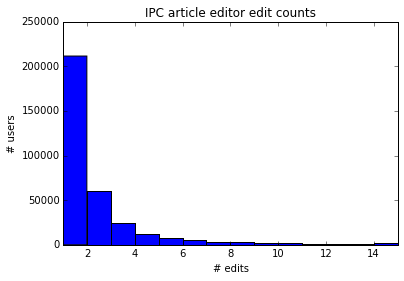

In [15]:
%matplotlib inline

# Number of article edits stats

hbins = range(1,16)
plt.hist(counts, bins=hbins)
plt.title("IPC article editor edit counts")
plt.xlabel("# edits")
plt.xlim([1,15])
plt.ylabel("# users")
fig = plt.gcf()
fig.show()

In [16]:
figpath = '/home/michael/school/cprose_research/wp_articles/ipc_article_editor_counts.png'
fig.savefig(figpath, dpi=400)

In [25]:
# Stats for editors in both
# Will take a long x

article_editors_in_both = [mention for mention in article_usernames if mention in both_usernames]
both_article_counter = Counter(article_editors_in_both)
len(both_article_counter)

5320

In [32]:
both_article_counts = Counter(both_article_counter.values())
#list(both_article_counts.items())[:40]
#for count in list(both_article_counts.values())[:70]:
#     print(count)

489
347
250
238
167
162
149
126
107
118
96
86
91
79
63
73
47
54
53
43
49
52
40
40
42
46
24
35
39
31
35
33
30
28
36
21
30
31
17
24
22
21
22
18
22
21
23
21
24
18
21
21
18
12
17
11
13
10
19
14
16
17
12
14
15
12
16
14
15
12


/usr/lib/python3/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


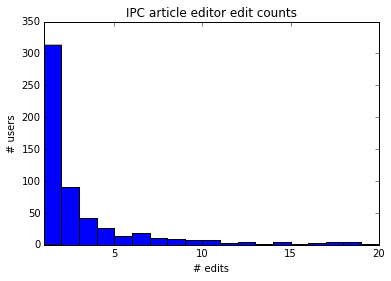

In [33]:
%matplotlib inline

# Counts of article edits for editors on both article and talk pages

hbins = range(1,21)
plt.hist(list(both_article_counts.values()), bins=hbins)
plt.title("IPC article editor edit counts")
plt.xlabel("# edits")
plt.xlim([1,20])
plt.ylabel("# users")
fig = plt.gcf()
fig.show()

In [7]:
# Look at editors in talk that don't do article edits
talk_no_article = [name for name in talk_counter.keys() if name not in both_usernames]
len(talk_no_article)

1141

In [8]:
talk_no_article_mentions = [name for name in talk_username_mentions if name in talk_no_article]
talk_no_article_counter = Counter(talk_no_article_mentions)
talk_no_article_counts = Counter(list(talk_no_article_counter.values()))
list(talk_no_article_counts.items())[:30]

[(1, 762),
 (2, 223),
 (3, 68),
 (4, 33),
 (5, 20),
 (6, 8),
 (7, 6),
 (40, 1),
 (9, 3),
 (10, 3),
 (11, 1),
 (12, 1),
 (66, 1),
 (14, 2),
 (13, 1),
 (27, 1),
 (8, 3),
 (15, 1),
 (230, 1),
 (29, 1),
 (37, 1)]